In [1]:
# Задание 1
# Вам предстоит создать модель для предсказания цен на недвижимость в Калифорнии.
# Однако перед этим необходимо провести отбор признаков для улучшения качества модели. 
# Используйте два метода отбора признаков, SBS (Sequential Backward Selection) и SBFS 
# (Sequential Backward Floating Selector), на датасете с данными о недвижимости в Калифорнии.
# После отбора признаков объедините отобранные признаки и обучите модель на оптимальном 
# наборе признаков. Ваша модель должна обучаться не менее, чем на 6 признаках. В качестве 
# метрики оптимизации используйте neg_mean_squared_error.

In [2]:
# Импорт необходимых библиотек
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector

In [3]:
# Загрузка датасета с данными о недвижимости в Калифорнии
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

In [4]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
lr = LinearRegression()

In [37]:
# Инициализация Sequential Feature Selector для backward selection
sbs = SequentialFeatureSelector(lr,
                                k_features=6, 
                                forward=False, 
                                floating=False, 
                                scoring="neg_mean_squared_error")

In [38]:
sbs

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=6, scoring='neg_mean_squared_error')

In [39]:
sbs = sbs.fit(X_train, y_train)

/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73

In [40]:
# Выбор признаков с помощью SBS
selected_features_sbs = X_train[:, sbs.k_feature_idx_]  # ваш код здесь #

In [41]:
selected_features_sbs

array([[   3.2596    ,   33.        ,    5.0176565 ,    1.00642055,
          32.71      , -117.03      ],
       [   3.8125    ,   49.        ,    4.47354497,    1.04100529,
          33.77      , -118.16      ],
       [   4.1563    ,    4.        ,    5.64583333,    0.98511905,
          34.66      , -120.48      ],
       ...,
       [   2.9344    ,   36.        ,    3.98671727,    1.07969639,
          34.03      , -118.38      ],
       [   5.7192    ,   15.        ,    6.39534884,    1.06797853,
          37.58      , -121.96      ],
       [   2.5755    ,   52.        ,    3.40257649,    1.05877617,
          37.77      , -122.42      ]])

In [42]:
# Инициализация Sequential Feature Selector с включённым параметром floating для SFFS
sbfs = SequentialFeatureSelector(lr,
                                k_features=6, 
                                forward=False, 
                                floating=True, 
                                scoring="neg_mean_squared_error") # ваш код здесь #

In [43]:
sbfs

SequentialFeatureSelector(estimator=LinearRegression(), floating=True,
                          forward=False, k_features=6,
                          scoring='neg_mean_squared_error')

In [44]:
sbfs = sbfs.fit(X_train, y_train)

/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73

In [45]:
# Выбор признаков с помощью SBFS
selected_features_sbfs = X_train[:, sbfs.k_feature_idx_] # ваш код здесь #

In [46]:
selected_features_sbfs

array([[   3.2596    ,   33.        ,    5.0176565 ,    1.00642055,
          32.71      , -117.03      ],
       [   3.8125    ,   49.        ,    4.47354497,    1.04100529,
          33.77      , -118.16      ],
       [   4.1563    ,    4.        ,    5.64583333,    0.98511905,
          34.66      , -120.48      ],
       ...,
       [   2.9344    ,   36.        ,    3.98671727,    1.07969639,
          34.03      , -118.38      ],
       [   5.7192    ,   15.        ,    6.39534884,    1.06797853,
          37.58      , -121.96      ],
       [   2.5755    ,   52.        ,    3.40257649,    1.05877617,
          37.77      , -122.42      ]])

In [47]:
# Объединение индексов выбранных признаков из SBS и SBFS для обучения
selected_features = list(set(sbs.k_feature_idx_).union(set(sbfs.k_feature_idx_)))# ваш код здесь #

In [48]:
selected_features

[0, 1, 2, 3, 6, 7]

In [49]:
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

In [50]:
X_train_selected

array([[   3.2596    ,   33.        ,    5.0176565 ,    1.00642055,
          32.71      , -117.03      ],
       [   3.8125    ,   49.        ,    4.47354497,    1.04100529,
          33.77      , -118.16      ],
       [   4.1563    ,    4.        ,    5.64583333,    0.98511905,
          34.66      , -120.48      ],
       ...,
       [   2.9344    ,   36.        ,    3.98671727,    1.07969639,
          34.03      , -118.38      ],
       [   5.7192    ,   15.        ,    6.39534884,    1.06797853,
          37.58      , -121.96      ],
       [   2.5755    ,   52.        ,    3.40257649,    1.05877617,
          37.77      , -122.42      ]])

In [51]:
# Обучение модели линейной регрессии на выбранных признаках
model = LinearRegression()
model.fit(X_train_selected, y_train)

LinearRegression()

In [52]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

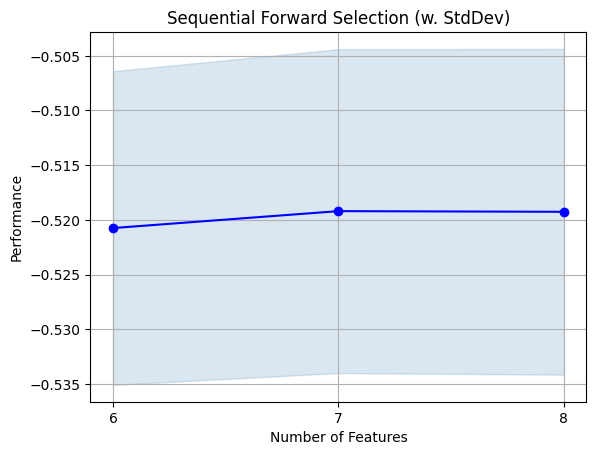

In [61]:
fig1 = plot_sfs(sbs.get_metric_dict(), kind='std_dev')

#plt.ylim([-0.8, 0])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show() 

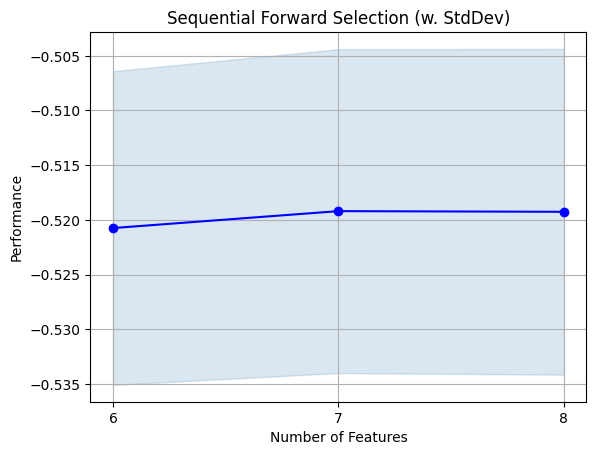

In [62]:
fig2 = plot_sfs(sbfs.get_metric_dict(), kind='std_dev')

#plt.ylim([-0.8, 0])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show() 

In [21]:
# Функция plot_sfs
# В библиотеке mlxtend есть возможность строить графики отбора признаков 
# по каждому из использованных методов. Так ML-инженер сможет быстро изучить, 
# как меняется результат работы модели в зависимости от добавленных признаков. 
# За визуализацию отвечает функция plot_sfs. На вход она принимает данные об 
# отборе признаков и тип графика, который мы хотим увидеть. 

In [22]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [23]:
iris_df = load_iris()
X = iris_df.data
y = iris_df.target

In [24]:
knn = KNeighborsClassifier(n_neighbors=3)
knn

KNeighborsClassifier(n_neighbors=3)

In [26]:
sfs = SFS(knn, 
          k_features=4, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          verbose=2,
          cv=5)
sfs

SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),
                          k_features=4, scoring='accuracy', verbose=2)

In [27]:
sfs = sfs.fit(X, y)

/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished

[2025-07-20 21:49:58]

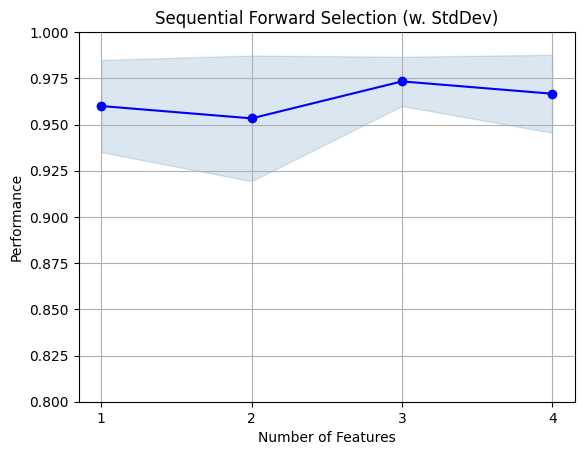

In [29]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show() 